# The magical universe of Harry Potter - Explainer notebook

# Index
* [1. Motivation](#motivation)<br>
* [2. Basic stats](#stats)<br>
    * [2.1 Data cleaning and preprocessing](#2-1-stats)<br>
        * [2.1.1 Wiki](#2-1-1-wiki)<br>
        * [2.1.2 Books](#2-1-2-books)<br>
        * [2.1.3 Scripts](#2-1-3-scripts)<br>
    * [2.2 Dataset stats](#2-2-stats)<br>
        * [2.2.1 Wiki](#2-2-1-wiki)<br>
        * [2.2.2 Books](#2-2-2-books)<br>
        * [2.2.3 Scripts](#2-2-3-scripts)<br>
* [3. Tools, theory and analysis](#tools)<br>
    * [3.1 Wiki](#3-1-wiki)
    * [3.2 Books](#3-2-books)
        * [3.2.1 Lexical dispersion](#3-2-1-lexicical)
        * [3.2.2 Term frequencies (TF)](#3-2-2-tf)
        * [3.2.3 Term frequency - Inverse document frequency (TF-IDF)](#3-2-3-tfidf)
        * [3.2.4 Sentiment analysis](#3-2-4-sentiment)
    * [3.3 Scripts]
* [4. Discussion](#discussion)<br>
* [5. Contributions](#contributions)<br>
* [6. Appendices](#appendix)<br>
    * [6.1 Book textfiles - data cleaning and preprocessing](#6-1-book-cleaning)

<a id='motivation'></a>
# 1. Motivation

* **What is your dataset?**<br>
Svar
<br>

* **Why did you choose these particular datsets?**<br>
Svar
<br>

* **What was your goal for the end user's experience?**<br>
Svar
<br>

<a id='stats'></a>
# 2. Basic stats. Let's understand the dataset better

In [1]:
# Import necessary packages and functions
import random, os, math, pickle, itertools, nltk, re, pprint, pandas as pd, numpy as np, copy, seaborn as sns, matplotlib.pyplot as plt

from os import path
from PIL import Image
from nltk import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud, ImageColorGenerator
%matplotlib inline
sns.set()

<a id='2-1-stats'></a>
## 2.1 Write about your choices in the data cleaning and preprocessing

<a id='2-1-1-wikis'></a>
### 2.1.1 Wikis

<a id='2-1-2-books'></a>
### 2.1.2 Books
Before the text files could be used for analysis they had to be cleaned and preprocessed.
This process was twofold: Manual modification and data cleaning and preprocessing in Python.

**Manual modiciations to the textfiles**

Since the format of each book was different from the next, it was necessary to reformat some of the files before they could be read into Python.

As there are only seven files, it was believed to be simplest to modify the textfiles manually so that every file would have the same format. Otherwise a different read function would have been needed for each text file. Each original file was copied and the modifications applied to the 

The manual modifications done:
* The title of the book is displayed in the first line of the file
* Each chapter beginning is defined by a new line starting with 'CHAPTER'
* The chapter name of each chapter was in a seperate line
* Each text file ends with 'THE END' on a spereate line
* Apostrophes switched out in some file so they would be uniform in all the files

**Data cleaning and pre-processing**

Further data cleaning was done when each file was read from the modified text files. As the function is very long, the code and detailed explaination of it, was moved to the appendix [6.1 Book textfiles - data cleaning and preprocessing](#6-1-book-cleaning). A summary of the main points is provided here.

In order to store all of the information from the books a datastructure was defined.
The datastructure defined is a list of books, where each book is a dictionary containing the information about the book. Further nested in each book is a list of the chapters of the books. Each chapter is a dictionary containing the information about that specific chapter in the book.

The steps performed in the data cleaning and pre-processing function are as follow:
* All hypens are removed from the text. There is a specific reason for this, as the *Voldemort* character is oftened referred to as *he-who-must-not-be-named* and it was considered important to be able to analyize the frequency of this specific terms. If this would not have been done, the statement would have been split into six commonly occuring words.
* The text of each chapter was tokenized using the nltk.word_tokenize() function. This is done so that the long string of text can be split up into words.
* The tokenized list is filtered using the .isalpha() function along with a list of stopwords as defined by the nltk.corpus.stopwords.words('english') list of stopwords. This makes sure that the list only contains words, but all numbers, punctuation marks and common stopwords will be filtered out.
* Lastly the words left remaining where lemmetized using the nltk.WordNetLemmatizer() function. This means that each word will be stemmed so only the original form of the word will be displayed. This means that for example *women* will be converted to the singular form *woman*.

In [2]:
# Read the books from the pickled file
with open('actual_books/books_list.pkl', 'rb') as f:
    books = pickle.load(f)
    
print("Number of books: ", len(books))

Number of books:  7


Each book is a dictionary containing further information about the book. Such as:
* The book's number in the series
* The book's title
* The number of chapters
* All the text of the book
* All the words of the book after clean up (tokenizing, removing stopwords, lemmitazing)

An example of the data for the last book can be seen in the next cell.

In [3]:
# Display information for a single book
print("Book number: ", books[6]['book_nr'])
print("Book name: ", books[6]['title'])
print("Number of chapters: ", books[6]['nr_chapters'])
print("Length of original text (char-count)", len(books[6]['all_text']))
print("First text: ", books[6]['all_text'][:83])
print("Number of word objects after clean-up: ", books[6]['all_text_clean_length'])
print("First few word objects: ", books[6]['all_text_clean'][0:9])
print("Number of unique words (clean): ", len(set(books[6]['all_text_clean'])))

Book number:  7
Book name:  Harry Potter and the Deathly Hallows
Number of chapters:  36
Length of original text (char-count) 1127369
First text:  The two men appeared out of nowhere, a few yards apart in the narrow, moonlit lane.
Number of word objects after clean-up:  101455
First few word objects:  ['two', 'men', 'appeared', 'nowhere', 'yard', 'apart', 'narrow', 'moonlit', 'lane']
Number of unique words (clean):  10367


Each book also contains a dictionary containing the information about each chapter of the book. This was included so that sentiment analysis could be done for each chapter specifically, in order to see how the sentiment evolves over time in the books. 

An example of the data for the second chapter of the book can be seen in the cell below.

In [4]:
print("Title of the chapter: ", books[6]['chapters'][1]['chapter_name'])
print("Length of original text (char-count)", len(books[6]['chapters'][1]['chapter_text']))
print("First text of the chapter: ", books[6]['chapters'][1]['chapter_text'][0:87])
print("Number of word objects after clean-up: ", len(books[6]['chapters'][1]['chapter_text_clean']))
print("First few word objects: ", books[6]['chapters'][1]['chapter_text_clean'][0:8])

Title of the chapter:  In Memorandum
Length of original text (char-count) 23557
First text of the chapter:  Harry was bleeding. Clutching his right hand in his left and swearing under his breath,
Number of word objects after clean-up:  2090
First few word objects:  ['harry', 'bleeding', 'clutching', 'right', 'hand', 'left', 'swearing', 'breath']


<a id='2-1-3-scripts'></a>
### 2.1.3 Scripts

<a id='#2-2-stats'></a>
## 2.2 Write a short section that discusses the dataset stats (here you can recycle the work you did for Project Assignment A)

<a id='#2-2-1-wiki'></a>
### 2.2.1 Wikis

<a id='#2-2-2-books'></a>
### 2.2.2 Books
The books dataset contains a single list that consists of dictionaries containing all the information from each book. These where generated from the textfiles as previously explained, so the dataset stats will consist of the information that can be extracted from there. The main things that describe these files are:
* Number of chapters in each book
* The average chapter length of uncleaned text in each book
* The total length of the uncleaned text in each book
* Number of words in the clean text (after tokenization, lemmitization and without stopwords) in each book
* Number of unique clean words in each book
* Unique word count ratio (# unique clean words / # clean words) in each book

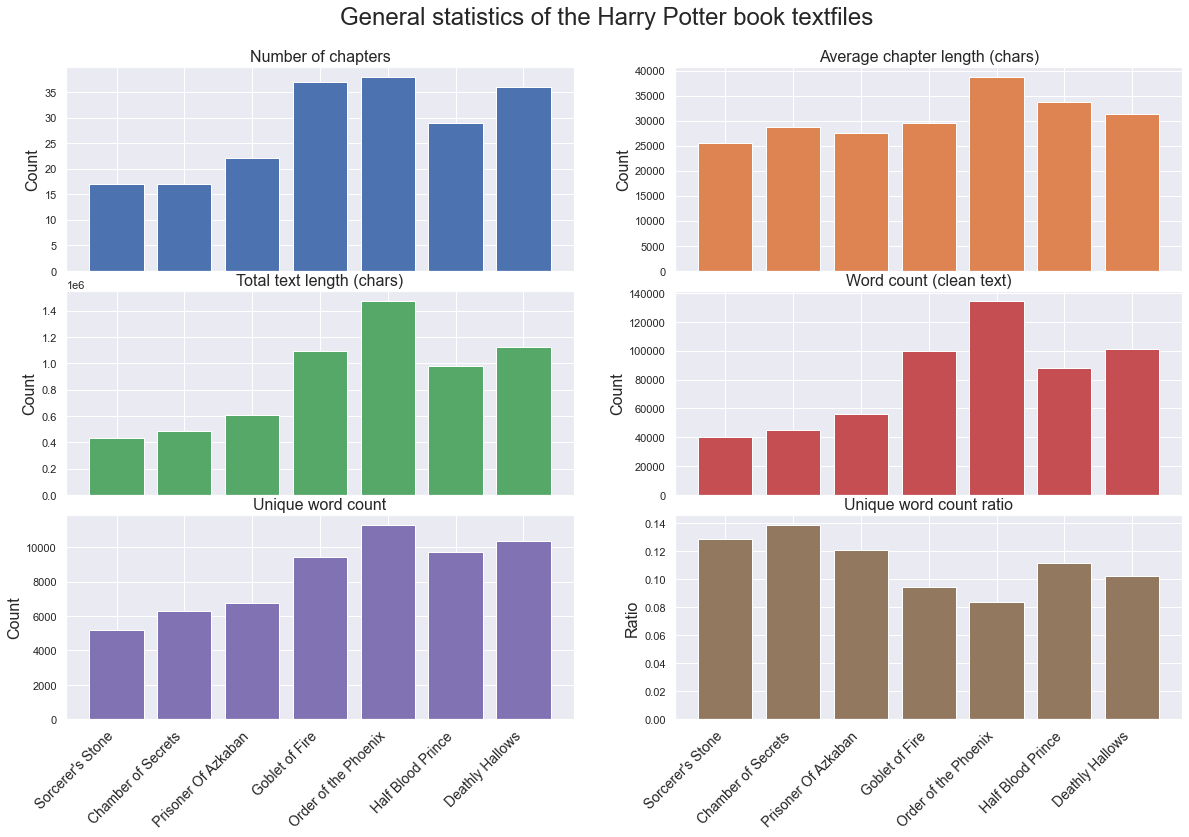

In [5]:
# Generate the data needed for the bar plots
names = [books[i]['title'] for i in range(len(books))] # Gather all the book names into a list
names_short = [books[i]['title'].split("Harry Potter and the ", 1)[1] for i in range(len(books))] # Gather the short version of the book names into a list
nr_chapters = [books[i]['nr_chapters'] for i in range(len(books))] # Get number of chapters for each book
word_count = [books[i]['all_text_clean_length'] for i in range(len(books))] # Word count for each book
unique_word_count = [len(set(books[i]['all_text_clean'])) for i in range(len(books))] # Unique word count fot each book
unique_word_count_ratio = [len(set(books[i]['all_text_clean']))/books[i]['all_text_clean_length'] for i in range(len(books))] # Calculate ratio for each book
text_length = [len(books[i]['all_text']) for i in range(len(books))] # Get the length of each book
avg_chapter_length = [round(np.mean([len(books[j]['chapters'][i]['chapter_text']) for i in range(books[j]['nr_chapters'])])) for j in range(len(books))] # Get average chapter length for each book

# Plot a barplot of the dataset stats (3x2 subplot)
fig, axes = plt.subplots(3, 2, sharex=True, figsize=(20,12), gridspec_kw={'hspace': 0.1})

palette = itertools.cycle(sns.color_palette())
# Number of chapters per book
axes[0][0].bar(names_short, nr_chapters, width = 0.8, color=next(palette))
axes[0][0].set_title('Number of chapters', fontsize=16)
axes[0][0].set_ylabel('Count', fontsize=16)
# Avg chapter length
axes[0][1].bar(names_short, avg_chapter_length, width = 0.8, color=next(palette))
axes[0][1].set_title('Average chapter length (chars)', fontsize=16)
axes[0][1].set_ylabel('Count', fontsize=16)
# Text length
axes[1][0].bar(names_short, text_length, width = 0.8, color=next(palette))
axes[1][0].set_title('Total text length (chars)', fontsize=16)
axes[1][0].set_ylabel('Count', fontsize=16)
# Word count
axes[1][1].bar(names_short, word_count, width = 0.8, color=next(palette))
axes[1][1].set_title('Word count (clean text)', fontsize=16)
axes[1][1].set_ylabel('Count', fontsize=16)
# Unique word count
axes[2][0].bar(names_short, unique_word_count, width = 0.8, color=next(palette))
axes[2][0].set_title('Unique word count', fontsize=16)
axes[2][0].set_ylabel('Count', fontsize=16)
# Unique ratio
axes[2][1].bar(names_short, unique_word_count_ratio, width = 0.8, color=next(palette))
axes[2][1].set_title('Unique word count ratio', fontsize=16)
axes[2][1].set_ylabel('Ratio', fontsize=16)

# Set the rotation and horizontal alignment of the x tick labels
plt.setp(axes[2][0].get_xticklabels(), rotation=45, ha="right", fontsize=14);
plt.setp(axes[2][1].get_xticklabels(), rotation=45, ha="right", fontsize=14);

# Set plot title
plt.suptitle('General statistics of the Harry Potter book textfiles', fontsize=24, y = 0.95);


From the above bar plot some interesting things can be seen
* *Order of the Phoenix* is the book with the highest number of chapters and the longest chapters on average. Therefore it is not surprising that it also has the longest total text and the highest word count after the text cleanup. It is also the book with the highest number of unique word. However, when the unique word ratio count is examined, the *Order of the Phoenix* is actually the book with the lowest number. This means that the vocabulary of the book is actually the least diverse of all the books. So the extra length is a result of words that are used in other places of the book.
* While the first two books, *Sorcerer's Stone* and *Chamber of Secrets* are the shortest, with respect to both text length and clean word count, these two books have the highest unique word count ratio. This means that the vocabulary usage is more diverse, with respect to length, than of the other books. 
* The total text length follows the word count of the clean text perfectly. This means that no one book was more effected by the clean-up process then another book was.

<a id='#2-2-3-scripts'></a>
### 2.2.3 Scripts

<a id='tools'></a>
# 3. Tools, theory and analysis. Describe the process of theory to insight
* **Talk about how you've worked with the text, including regular expressions, unicode, etc.**
* **Describe which network science tools and data analysis strategies you've used, how those network science measures work, and why the tools you've chosen are right for the problem you are solving.**
* **How did you use the tools to understand your dataset?**

Setup:

* Explain the overall idea
* Analysis step 1
    * Explain what you're interested in
    * Explain the tool
    * apply the tool
    * Discuss the outcome
* Analysis step 2
    * Explain what you're interested in
    * Explain the tool
    * apply the tool
    * Discuss the outcome
* Analysis step 3
    * Explain what you're interested in
    * Explain the tool
    * apply the tool
    * Discuss the outcome

<a id='#3-1-wiki'></a>
## 3.1 Wiki

<a id='#3-2-books'></a>
## 3.2 Books

<a id='#3-2-1-lexicical'></a>
### 3.2.1 Lexical dispersion analysis

<font color='red'>**TO-DO-KBL**</font>

In order to so the original dispersion plot from the nltk package has to be modifed.
The code cell below contains a copy of the original dispersion plot function, but now it includes the added input parameter vlines, which is a vector of the positions where the horizontal lines should be plotted.

In [6]:
# To be able to generate the vertical lines to indicate where each book starts, we need to modify the dispersion_plot
# from the nltk package

def dispersion_plot_w_hlines(text, words, vlines, ignore_case=False, title="Lexical Dispersion Plot"):
    """
    Generate a lexical dispersion plot.

    :param text: The source text
    :type text: list(str) or enum(str)
    :param words: The target words
    :type words: list of str
    :param ignore_case: flag to set if case should be ignored when searching text
    :type ignore_case: bool
    """

    try:
        from matplotlib import pylab
    except ImportError:
        raise ValueError(
            "The plot function requires matplotlib to be installed."
            "See http://matplotlib.org/"
        )

    text = list(text)
    words.reverse()

    if ignore_case:
        words_to_comp = list(map(str.lower, words))
        text_to_comp = list(map(str.lower, text))
    else:
        words_to_comp = words
        text_to_comp = text

    points = [
        (x, y)
        for x in range(len(text_to_comp))
        for y in range(len(words_to_comp))
        if text_to_comp[x] == words_to_comp[y]
    ]
    if points:
        x, y = list(zip(*points))
    else:
        x = y = ()
    pylab.plot(x, y, "b|", scalex=0.1)
    pylab.yticks(list(range(len(words))), words, color="b")
    pylab.ylim(-1, len(words))
    pylab.title(title)
    pylab.xlabel("Word Offset")
    ax.grid(False)
    
    for v in vlines:
        plt.axvline(x=v, alpha = 0.3, color='r')
    
    pylab.show()

<font color='red'>**TO-DO-KBL**</font>
Add explaination of next steps

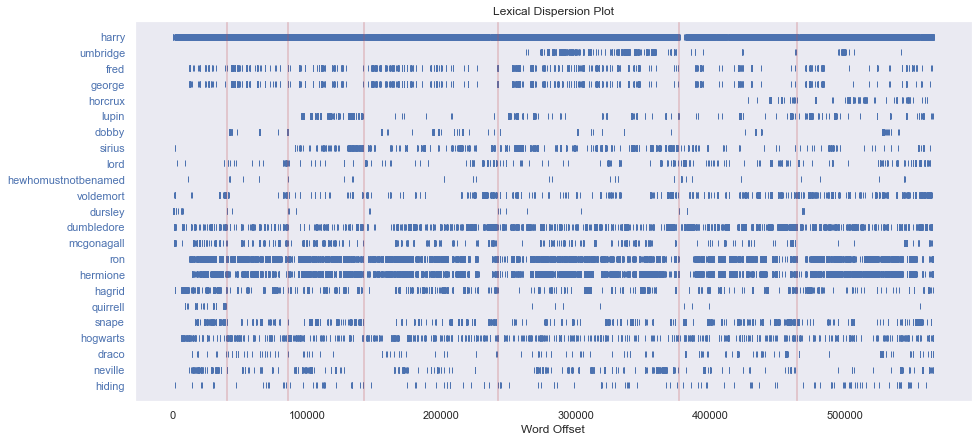

In [7]:
# Read all the clean text from a pickled file
with open('actual_books/clean_text_from_all_books.pkl', 'rb') as f:
    clean_text_from_all_books = pickle.load(f)

# Convert the text into a nltk Text object so that further analysis can be done
text_clean_all = nltk.Text(clean_text_from_all_books)

# Generate the positions to use for the vertical line should be in the plot
vlines_books = []
for book in books:
    vlines_books.append(book['all_text_clean_length']) 
vlines_books = np.cumsum(vlines_books)

# Generate the plot by call the function with the added parameters
fig, ax = plt.subplots(figsize=(15,7))
dispersion_plot_w_hlines(text_clean_all, ["harry", "umbridge", "fred", "george", "horcrux", "lupin", "dobby", "sirius", "lord", "hewhomustnotbenamed", "voldemort", "dursley", "dumbledore", "mcgonagall", "ron", "hermione", "hagrid", "quirrell", "snape",'hogwarts', "draco", "neville", "hiding"], vlines_books[:-1])

<font color='red'>**TO-DO-KBL**</font>
Add explaination and findings

<a id='#3-2-2-tf'></a>
### 3.2.2 Term frequency (TF) analysis
The next analysis that will be interesting to perform on the books dataset is a term frequency analysis.
Here the idea is to extract which terms are most common in each book and in the books overall.

In order to compute the term frequencies the list of clean words for each book will be used.
The list is sent throught the nltk.FreqDist() function, which returns a frequency distribution dictionary, where each unique word is a key and the value is a count of how many times that term occurs in the book.

As seen in [2.2.2 Dataset stats - Books](#2-2-2-books) the different books are of vastly different lengths. Therefore the term frequencies of the longest book will be much higher than the term frequencies of the shorter books. In order to account for this all the term frequencies are normalized by the total length of the word list. This means that each term frequency will be adjusted for the document length, and therefore the values should be comparable between the different books.

To achive this, a loop is generated that goes through each book in the list 'books'. It computes the frequency distribution and makes a deep copy so that the structure can be reused to contain the normalized frequency distribution as well. The length of each document is extracted and the another loop is created that loops through each word in the term frequency dictionary. In each step the normalized weight is computed and stored in the normalized frequency dictionary. 

Finally both the frequency distribution and the normalized frequency distribution are added as attributes to the book dictionary. That way they can be easily accessed later on.

In [8]:
# Generate nltk text objects and compute frequency distribution and normalixed frequency distribution
for book in books:

    # generate the text object needed to compute frequencies
    nltk_text = nltk.Text(book['all_text_clean'])
    
    # Generate the frequency distribution
    fdist = nltk.FreqDist(nltk_text)
    
    # Assign them to each book dictionary
    book['fdist'] = fdist
    
    # generate the normalized frequencies - here normalized by the length of the clean text
    fdist_norm = copy.deepcopy(fdist)
    
    # Extract the length of the clean text
    length = book['all_text_clean_length']
    
    # Loop through each word and divide the frequency with the length of the document
    for word in fdist_norm:
        fdist_norm[word] = fdist[word] / length

    # Assign the normalized frequency distribution to the dictionaries of books
    book['fdist_norm'] = fdist_norm
    
    # Then we will also create a fdist for each chapter as well
    for chapter in book['chapters']:
        nltk_text_chapter = nltk.Text(chapter['chapter_text_clean'])
        fdist_chapter = nltk.FreqDist(nltk_text_chapter)
        chapter['fdist'] = fdist_chapter

Now some inbuilt methods for the frequency distribution dictionary can be used to display the most common terms of the first book. In the next cell the top 10 most frequent values of the first book can be seen along with their counts.

In [9]:
print(books[0]['fdist'].most_common(10))

[('harry', 1325), ('said', 794), ('ron', 429), ('hagrid', 369), ('could', 303), ('hermione', 270), ('one', 266), ('back', 264), ('know', 209), ('got', 206)]


It is not surprising that the most frequent term is **harry** as he is the protagonist. Other frequent character names are those of his best friends, **ron** and **hermione** along with **hagrid**, who is a prominent character in the first book. Other common words include verbs such as **said** and **could**.

In order to visualize the most common terms across the books it was decided to create a set of words, containing the top 10 most frequently occuring words in each book. That way it would be possible to see if there are differences between the books, with some terms being frequent in one book, but not the next. In order to do so, the top 10 most common terms of each book was collected into a list. Then a set of the list was defined. The order in which the words will be displayed is defined by the sum of all the term frequencies over all the books. That way terms that are only frequent in a small subset of the books will be displayed lowest.

In [10]:
# Collect all the top 10 most common words in each book into a set
most_common_words = []

for i in range(len(books)):
    terms = [term for (term, freq) in books[i]['fdist_norm'].most_common(10)]
    most_common_words.extend(terms)

word_set = list(set(most_common_words))

# Collect the total relative frequency of each word so that the order can be defined
word_set_freq = []
for word in word_set:
    word_freq = 0
    for i in range(len(books)):
        word_freq += books[i]['fdist_norm'][word]
    word_set_freq.append(word_freq)

# create a list of the correctly sorted elements
word_set_sorted = list(np.array(word_set)[np.argsort(word_set_freq).astype(int)])

Finally a subplot of horizontal barcharts are created, each representing the term frequencies from a single book.

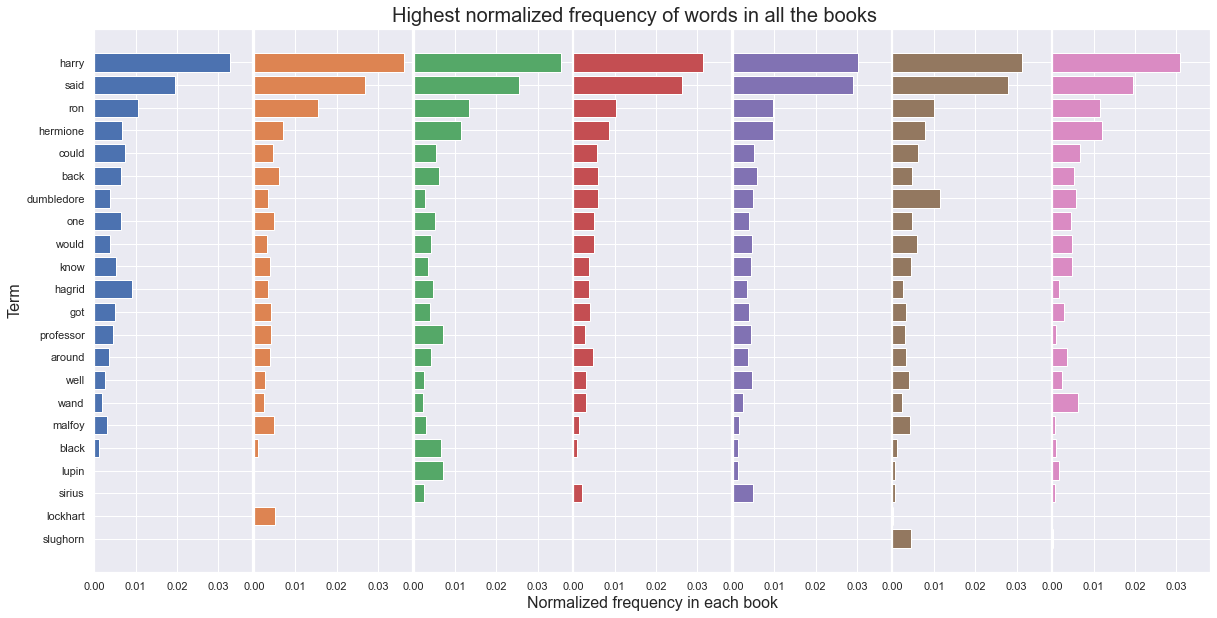

In [14]:
# Create a subplot of barplots for the visualization
fig, axes = plt.subplots(1, 7, sharey=True, sharex=True, figsize=(20,10), gridspec_kw={'wspace':0.01, 'hspace':0.01}, squeeze=True)

# Generate a palette to create a new color in each graph
palette = itertools.cycle(sns.color_palette())

for i in range(len(books)): # for each book

    height = [] # vector to collect the height of terms

    for word in word_set_sorted: # Get the frequency of a term
        height.append(books[i]['fdist_norm'][word])

    # Create the list of bars for the plot
    bars = word_set_sorted

    # Generate the position of the bars
    y_pos = np.arange(len(bars))

    # Create horizontal bars
    axes[i].barh(y_pos, height, color=next(palette))
    
# Create names on the y-axis, title and labels
plt.yticks(np.arange(len(bars)), word_set_sorted);
fig.suptitle('Highest normalized frequency of words in all the books', fontsize=20, y = 0.91);
axes[3].set_xlabel('Normalized frequency in each book', fontsize=16);
axes[0].set_ylabel('Term', fontsize=16);

<font color='red'>**TO-DO-KBL**</font>
Add explaination and findings

EXplain next step

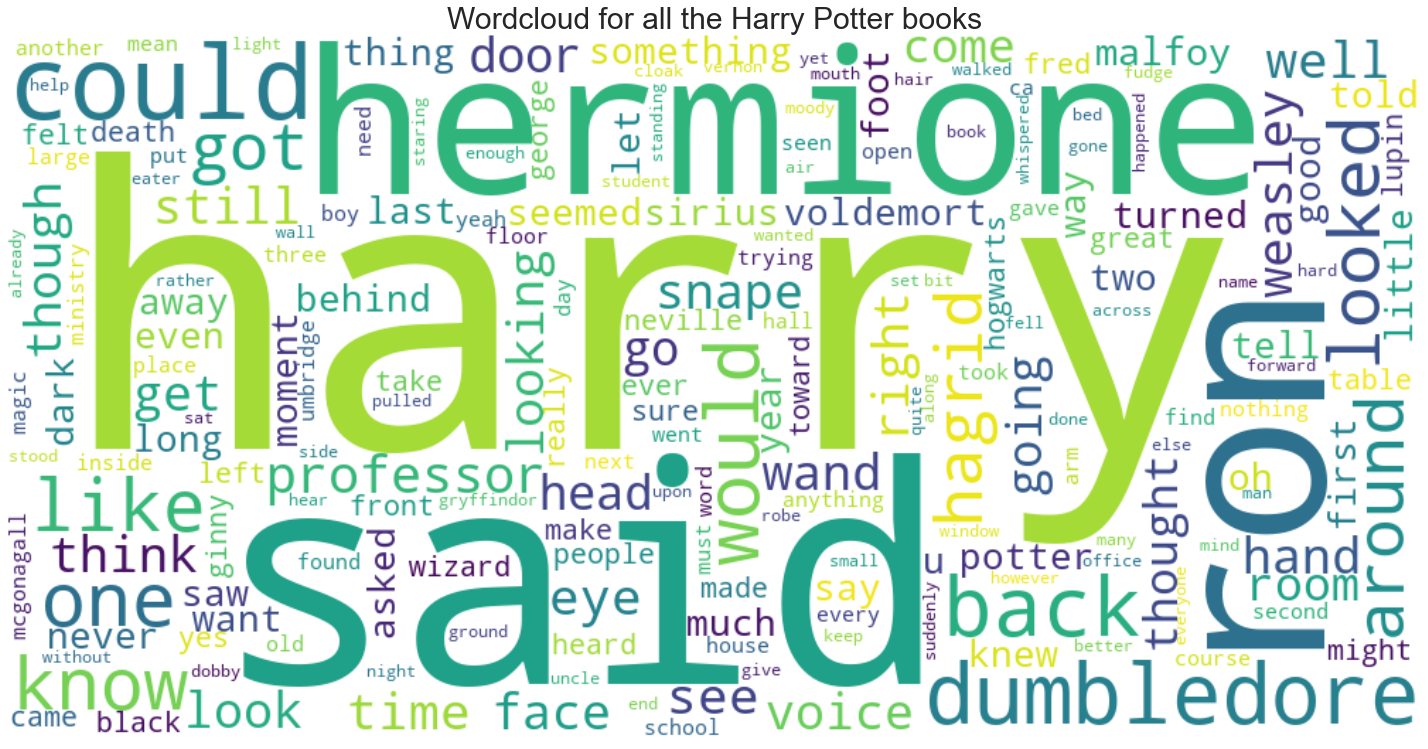

In [15]:
# Generate TF from all text
fdist_all_books = nltk.FreqDist(text_clean_all)

# Define the settings and input to the wordclouds - DC
wordcloud_all_books = WordCloud(background_color='White',   
                         width=1000, 
                         height=500, 
                         colormap="viridis"
                        ).generate_from_frequencies(fdist_all_books)

# Plot the wordcloud
plt.figure(figsize=(20,15))
plt.imshow(wordcloud_all_books, interpolation='bilinear')
plt.title("Wordcloud for all the Harry Potter books", fontsize=30)
plt.axis("off")
plt.tight_layout()

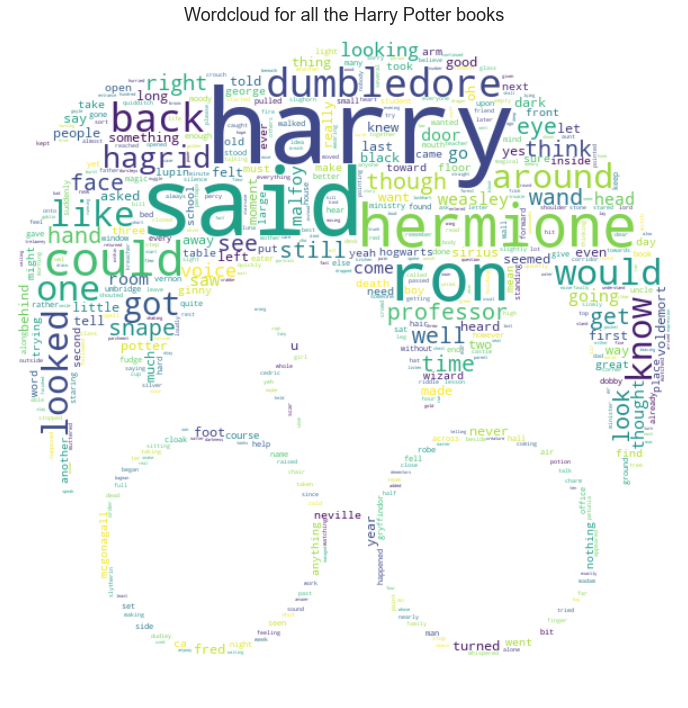

In [16]:
# get working directory
d = os.getcwd()

# read the mask image 
# https://heikostumbeck.dk/wp-content/uploads/2017/11/2d0b32de425b8b06be204f148d146849-harry-potter-silhouette-stencil-harry-potter-stencils.jpg
hp_mask = np.array(Image.open(path.join(d, "actual_books/hp_haus.jpg")))

# Define the settings and input to the wordclouds
wordcloud_all_books = WordCloud(background_color='white',   
                         width=1200,
                         max_words=2000,
                         height=1200, 
                         colormap="viridis",
                         mask = hp_mask,
                         random_state = 42 # set a random state so that it does not change between runs
                        ).generate_from_frequencies(fdist_all_books)

# Generate the figure
plt.figure(figsize=(10,10))
plt.imshow(wordcloud_all_books, interpolation='bilinear')
plt.title("Wordcloud for all the Harry Potter books", fontsize=18)
plt.axis("off")
plt.tight_layout()

<font color='red'>**TO-DO-KBL**</font>
Add explaination and findings

<a id='#3-2-3-tfidf'></a>
### 3.2.3 Term frequency - Inverse document frequency (TF-IDF) analysis

In [17]:
# Create a copy where we will overwrite the values to include the tf-idf in each book

# Loop through each book
for book in books:
    tf_idf = copy.deepcopy(book['fdist_norm'])
    
    for word in book['fdist_norm']:
        doc_count = 0 # reset doc count
        
        for inner_book in books: # Loop through all the documents again
            if word in inner_book['fdist_norm'].keys(): # if the word is a key in the inner books
                doc_count = doc_count + 1 # increase the doc count
        tf_idf[word] = tf_idf[word] * (math.log(7 / (doc_count+1)))
        
    # add the tf_idf to the dictionary of the book
    book['tf_idf'] = tf_idf

In [20]:
books[0]['tf_idf'].most_common(5)

[('quirrell', 0.0009304451755857944),
 ('flamel', 0.000564837347055812),
 ('mom', 0.0003974781331133492),
 ('pier', 0.00033471842788492564),
 ('nicolas', 0.0003137985261421178)]

In [21]:
# Collect the word cloud objects into a dictionary
wordclouds = {}

for idx, book in enumerate(books):
    
    color_maps = ["viridis", "plasma", "inferno", "magma", "cividis"]
    
    random_color_map = random.choice(color_maps)
    
    wordclouds[idx] = WordCloud(collocations=False, 
                                             background_color='White', 
                                             width=800, 
                                             height=400, 
                                             colormap="viridis",
                                             random_state=42
                                             #stopwords = manual_stopwords  ### this does not work with generate_from_frequencies
                        ).generate_from_frequencies(book['tf_idf'])

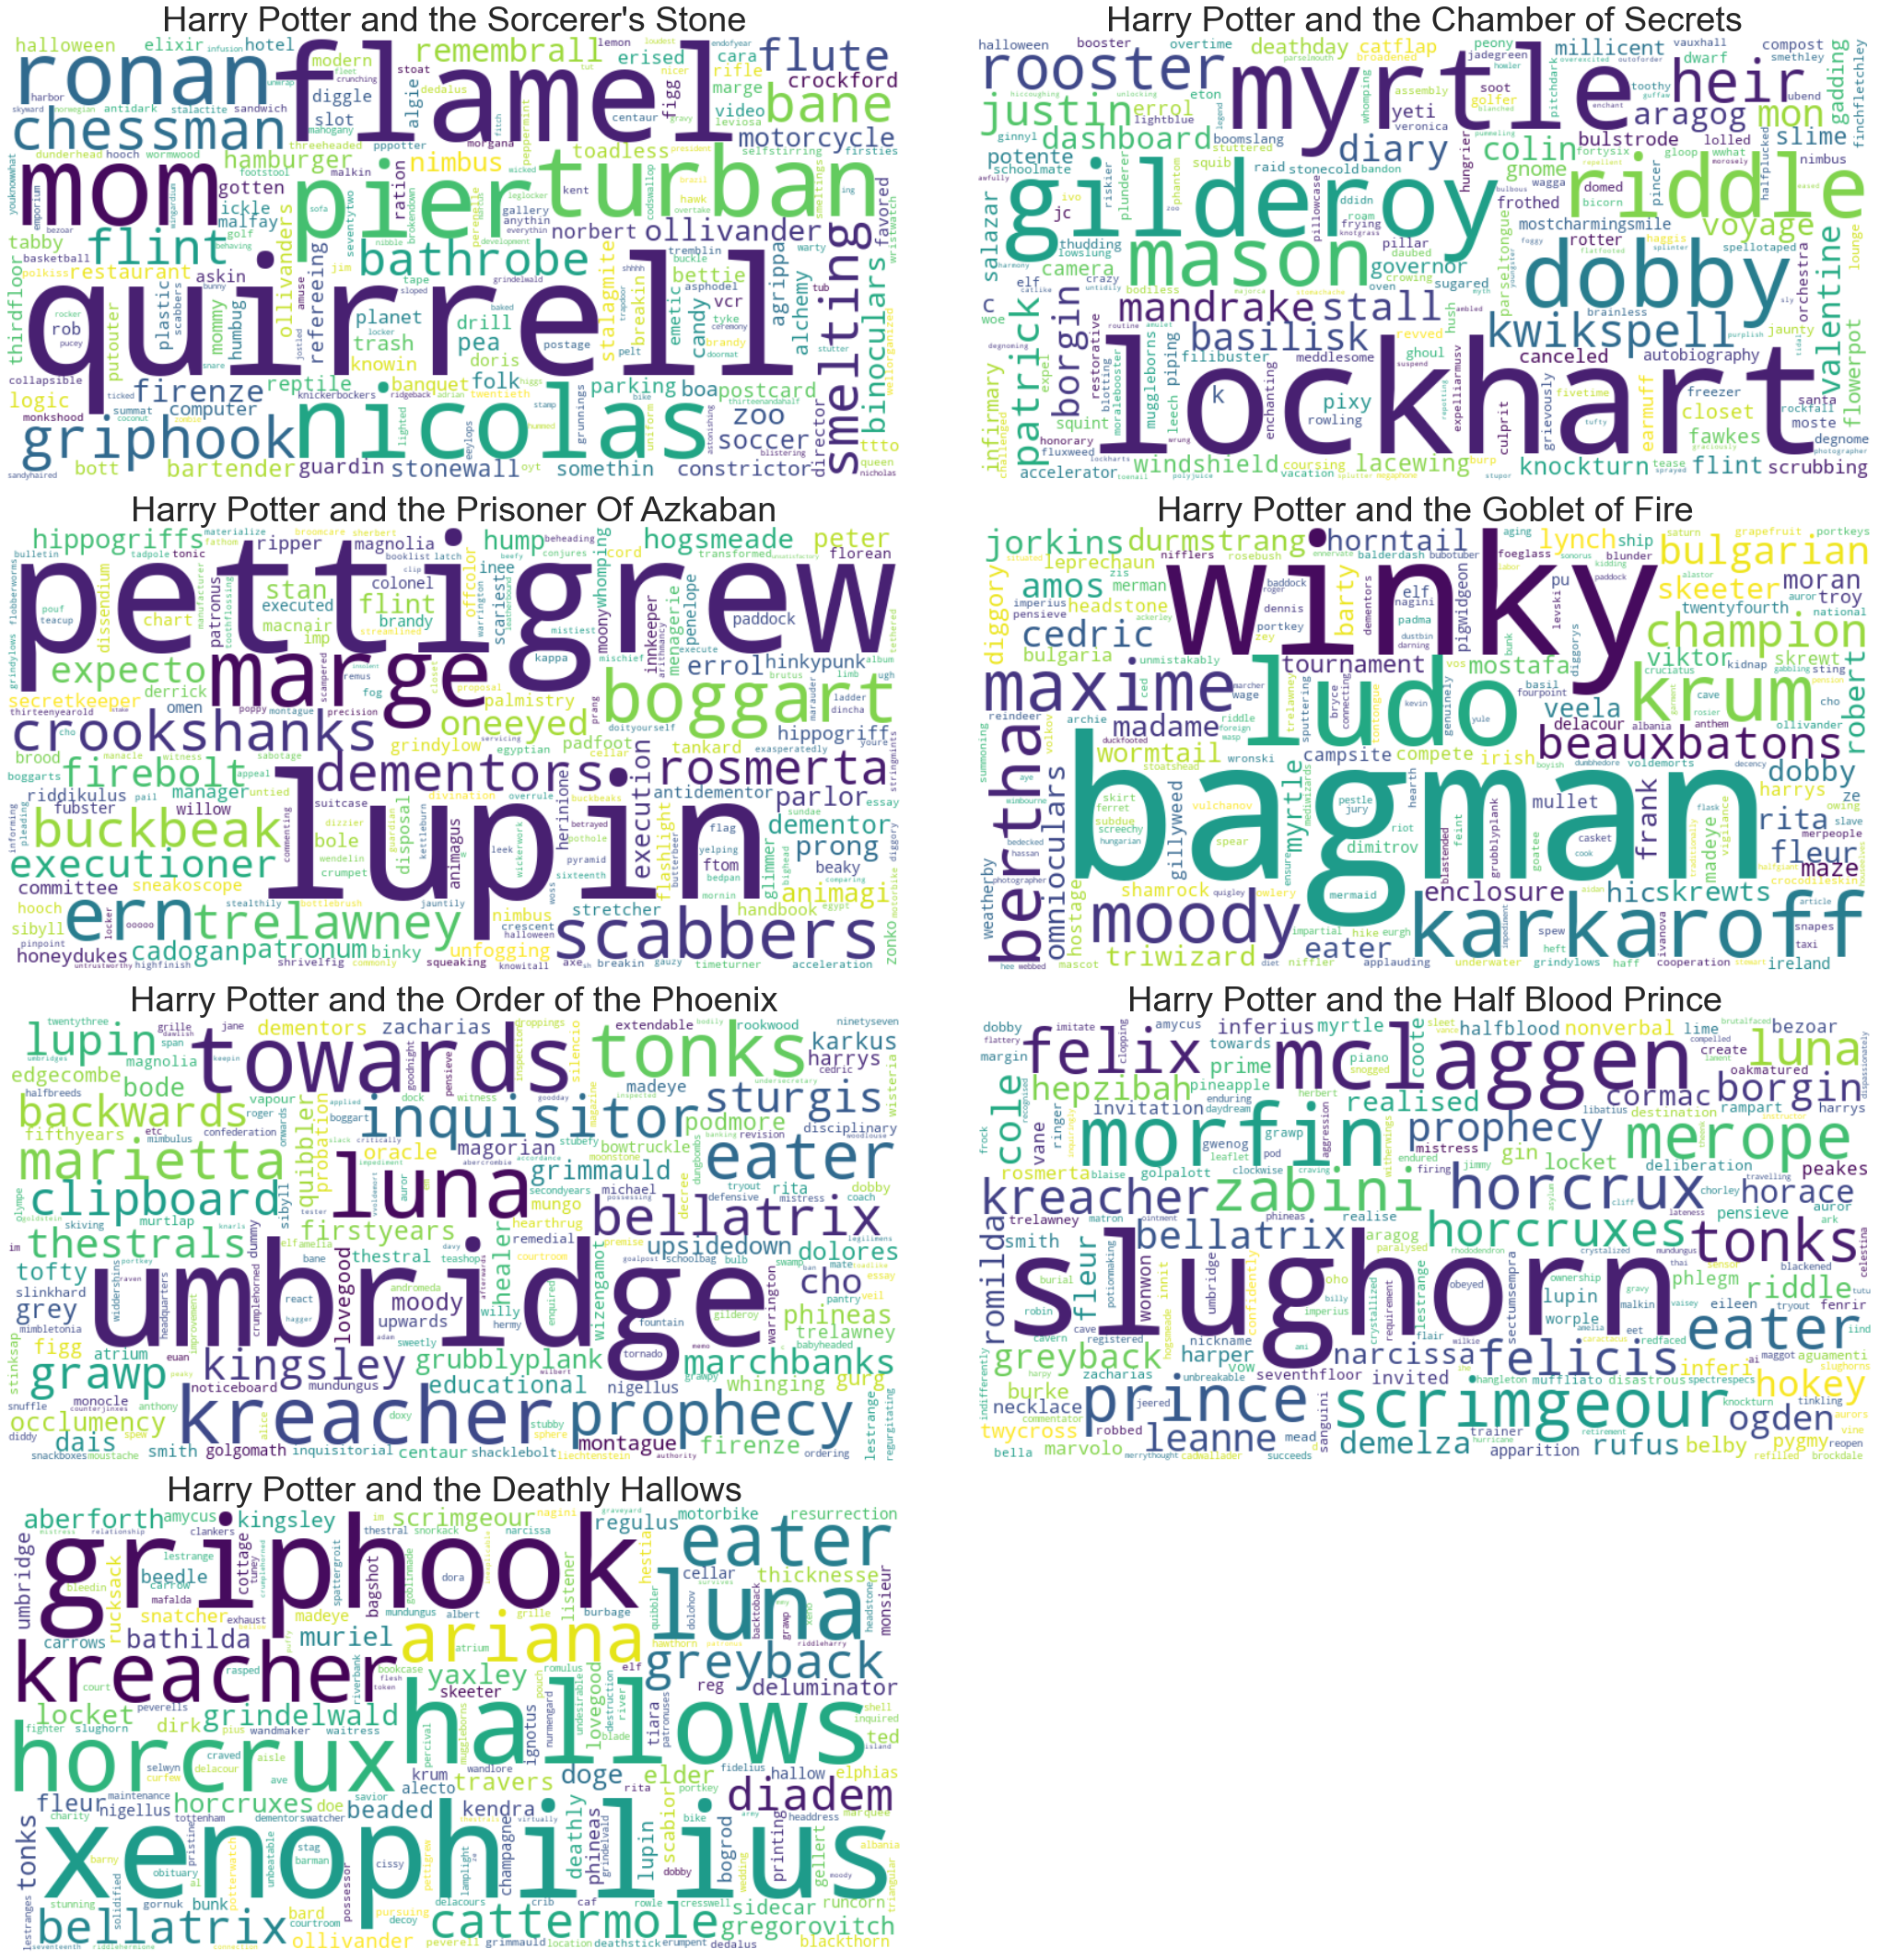

In [22]:
# Generate a single figure
plt.figure(figsize=(30,30))

for idx, community_number in enumerate(wordclouds):
    plt.subplot(4, 2, idx+1);
    plt.imshow(wordclouds[idx], interpolation='bilinear');
    plt.title(books[idx]['title'], size = 38);
    plt.tight_layout();
    plt.axis("off");

<a id='#3-2-4-sentiment'></a>
### 3.2.3 3.2.4 Sentiment analysis

In [23]:
# Load the text file into a table
word_sentiments = pd.read_csv('actual_books/Data_Set_S1.txt', skiprows = 3, sep="\t")
word_sentiments.set_index('word', inplace = True)

# Convert the happiness_average into a dictinary with the word as key
w_happiness = word_sentiments['happiness_average'].to_dict()

In [24]:
books[0]['fdist']

FreqDist({'harry': 1325, 'said': 794, 'ron': 429, 'hagrid': 369, 'could': 303, 'hermione': 270, 'one': 266, 'back': 264, 'know': 209, 'got': 206, ...})

In [25]:
avg_book_happiness = []

for book in books:

    total_happiness = 0
    word_count_w_sentiment = 0
    for term in book['fdist']:
        if term in w_happiness.keys():
            total_happiness += book['fdist'][term] * w_happiness[term]
            word_count_w_sentiment += book['fdist'][term]

    avg_happiness = total_happiness / word_count_w_sentiment
    avg_book_happiness.append(avg_happiness)

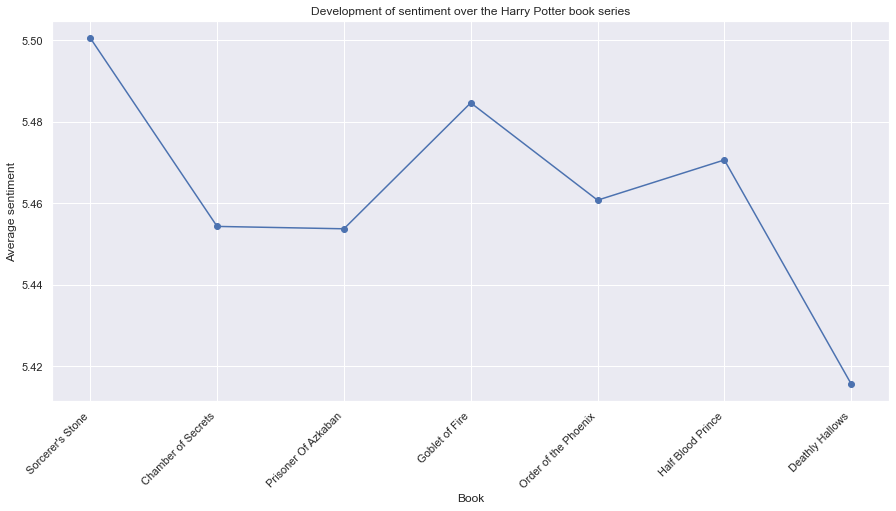

In [26]:
plt.figure(figsize=(15,7))
plt.plot(avg_book_happiness, 'o-');
plt.title('Development of sentiment over the Harry Potter book series')
plt.xlabel('Book')
plt.xticks(range(len(books)), names_short, rotation=45, ha="right")  # Set locations and labels
plt.ylabel('Average sentiment');

In [27]:
avg_chapter_happiness = []
book_numbers = []

for book in books:

    for chapter in book['chapters']:
    
        total_happiness = 0
        word_count_w_sentiment = 0
        
        for term in chapter['fdist']:
            if term in w_happiness.keys():
                total_happiness += chapter['fdist'][term] * w_happiness[term]
                word_count_w_sentiment += chapter['fdist'][term]

        avg_happiness = total_happiness / word_count_w_sentiment
        avg_chapter_happiness.append(avg_happiness)
        book_numbers.append(book['book_nr'])
        
        # Add the average chapter sentiment to the dictionary
        chapter['avg_sentiment'] = avg_happiness
        
        
df = pd.DataFrame(list(zip(list(book_numbers),list(avg_chapter_happiness), range(len(avg_chapter_happiness)))), columns=['book_numbers', 'avg_chapter_happiness', 'range'])
df

book_numbers  avg_chapter_happiness  range
0               1               5.572971      0
1               1               5.543329      1
2               1               5.539672      2
3               1               5.418323      3
4               1               5.565985      4
..            ...                    ...    ...
191             7               5.231479    191
192             7               5.436884    192
193             7               5.404235    193
194             7               5.413777    194
195             7               5.365095    195

[196 rows x 3 columns]

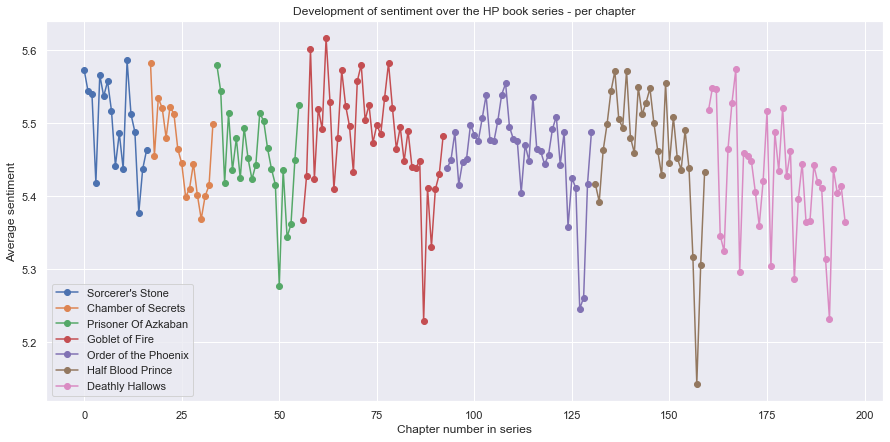

In [29]:
plt.figure(figsize=(15,7))

current_index = 0
palette = itertools.cycle(sns.color_palette())

for book_nr, book in enumerate(books):
    nr_chapters = book['nr_chapters']
    indexes = np.arange(current_index, current_index + nr_chapters)
    values = df['avg_chapter_happiness'][current_index:(current_index+nr_chapters)]
    plt.plot(indexes, values, 'o-', color=next(palette));
    current_index += nr_chapters
    
plt.title('Development of sentiment over the HP book series - per chapter')
plt.xlabel('Chapter number in series')
plt.legend(names_short)
#plt.xticks(range(len(books)), names_short, rotation=45, ha="right")  # Set locations and labels

plt.ylabel('Average sentiment');

In [30]:
books[5]['chapters'][-3]['chapter_name']

'Flight of the Prince'

#https://harrypotter.fandom.com/wiki/Harry_Potter_and_the_Half-Blood_Prince#Chapter_28:_Flight_of_the_Prince

Released from the spell after Dumbledore's death, Harry pursues Snape through battle in the halls of the school and out onto the grounds. Near the entrance to Hogwarts, Harry attempts to curse Snape, who repels his attacks with ease and reminds the other Death Eaters they are not to harm the boy. When Harry tries one of the Half-Blood Prince's spells, an enraged Snape reveals that the spell is his own. He is the Half-Blood Prince, having taken the title when he was a student as a pun on his mother's maiden name. (Hermione's research later reveals that Snape's father was a Muggle named Tobias Snape and his mother a pureblood witch named Eileen Prince.) Buckbeak the Hippogriff attacks Snape, who leaves Harry behind and escapes with Draco Malfoy. When he returns to Dumbledore's body, Harry finds that the locket was a fake: the real horcrux was already stolen by someone with the initials R.A.B.

<a id='#3-3-scripts'></a>
## 3.3 Scripts

<a id='discussion'></a>
# 4. Discussion. Think critically about your creation
* **What went well?**
* **What is still missing?**
* **What could be improved?**
* **Why?**

<a id='contributions'></a>
# 5. Contibutions. Who did what?
* **You should write (just briefly) which group memeber was the main responsible for which elements of the assignment. (I want you guys to understand every part of the assignment, but usually there is someone who took lead role in certain portions of the work. That's what you should explain.**
* **It is not OK to simply write "All group members contributed equally"**

<a id='index'></a>
# 6. Appendices

<a id='6-1-book-cleaning'></a>
## 6.1 Book textfiles - data cleaning and preprocessing
The first step in the data cleaning and preprocessing was the manual modification as explained previously in [2.1.2 Data cleaning and preprocessing - Books](#2-1-2-books)<br>

When all the fixed files where ready for the data cleaning and preprocessing the filenames where gathered into a list. Then the list of stopwords was created from the nltk.corpus.stopwords.words('english') function. A word lemmetizer object was created from the nltk.WordNetLemmatizer(). These will be used later on. Lastly the datastructures needed are initialized, but data from each iteration will be appended to these structures.

In [ ]:
# Books source: http://www.glozman.com/textpages.html
# Book 2 source: https://github.com/formcept/whiteboard/blob/master/nbviewer/notebooks/data/harrypotter/Book%202%20-%20The%20Chamber%20of%20Secrets.txt

# Gather the filenames needed for the analysis
booknames = [
    "actual_books/Harry Potter 1 - Sorcerer's Stone FIXED.txt",
    "actual_books/Harry Potter 2 - Chamber of Secrets - FIXED.txt",
    "actual_books/Harry Potter 3 - The Prisoner Of Azkaban - FIXED.txt",
    "actual_books/Harry Potter 4 - The Goblet Of Fire - FIXED.txt",
    "actual_books/Harry Potter 5 - Order of the Phoenix - FIXED.txt",
    "actual_books/Harry Potter 6 - The Half Blood Prince - FIXED.txt",
    "actual_books/Harry Potter 7 - Deathly Hollows - FIXED.txt"
]

# Create a lemmatization object to use and stopwords
stopwords = nltk.corpus.stopwords.words('english')
wnl = nltk.WordNetLemmatizer()

# Initialize the datastructure to store all the information
books = []
text_from_all_books = """"""
clean_text_from_all_books = []

The next step is to loop through all the book. For each book a book dictionary called 'book' is created. It will later store all the relevant information for each book, such as the title, the number of chapters each book has, it's number in the series, all its text, before and after cleaning along with the number of word objects after cleaning.

Each text file is opened using the *utf-8* encoding and all the lines read and those containing only a new line character (emptpy lines) are skipped.

As previously explained the format of all the text files is that the first row contains the title. That row is assigned as the value of the 'title' key for the 'book' dictionary.

Then the indices of all the chapter starts are extracted, but this is possible using the simple logic of finding all indices where the line starts with 'CHAPTER'. Again this is possible because of the manual preprocessing steps previously done, where each file was fixed to fit a specified format.

Finally the end index is extracted by finding the index of the line that starts with 'THE END'.

Next step of the function is to loop through all the chapters.
For each chapter a new dictionary object is created to store the information about the chapter.
When a new chapter object is created, the chapter count of the book is increased by one. 
The title of the chapter is extracted and put as the chapter['title'] value.

Then the text of the chapter is extracted and made into a single long string. Next all the hyphens of the text are removed, so that some commonly hyphened words can be seen in the analysis, such as He-Who-Must-Not-Be-Named. The text is then added to the chapter dictionary.

Then the original text is tokenized and, everything is cast to lower-case and non-words removed from the list. Then common stopwords are removed using the list of stopwords defined in the previous cell. The cleaned text is added to the chapter dictionary. Then the chapter is added to the list of chapters for the book, and both texts, the original and clean, appended to the total text of the book.

When the loop has has gone over all the chapters, the length of the clean book text (clean word count) is added to the book dictionary. After that the book is then appended to the list of books that was created in the previous cell. Additionally the text from all the books is gathered into a single string in the previously defined variable 'text_from_all_books' and the cleaned text from all the books is gathered into the 'clean_text_from_all_books' variable previously defined.

In [ ]:
# Loop through each book 
for idx, name in enumerate(booknames):

    # Generate a new book dictionary
    book = {
        'title' : "",
        'book_nr' : idx+1,
        'nr_chapters' : 0,
        'chapters' : [],
        'all_text' : """""",
        'all_text_clean' : [],
        'all_text_clean_length' : 0
    }

    f = open(name, encoding="utf-8", errors='ignore')         # Open the file
    lines = f.readlines()                                     # Read all the lines
    lines = [line.rstrip() for line in lines if line != '\n'] # Skip empty rows and remove whitespace from the end

    # The first line contains the title of the book
    book['title'] = lines[0]

    # Find all the indexes where chapters start and the final one where the book ends
    chapter_starts_indexes = [lines.index(l) for l in lines if l.startswith('CHAPTER')]
    the_end_index = [lines.index(l) for l in lines if l.startswith('THE END')][0]

    # Extract the text and information about each chapter
    for i in range(len(chapter_starts_indexes)):

        chapter = {
            'chapter_name' : '',
            'chapter_text' : """""",
            'chapter_text_clean' : []
        }

        # increase the chapter count
        book['nr_chapters'] += 1

        # extract the chapter name
        chapter['chapter_name'] = lines[chapter_starts_indexes[i]+1]

        # If it is not the last chapter
        if i < len(chapter_starts_indexes)-1: 
            # Use a simple slice to select the lines of the text.
            text = lines[chapter_starts_indexes[i]+2:chapter_starts_indexes[i+1]]  
        else:
            # Get all the text for the index slice until the end index
            text = lines[chapter_starts_indexes[i]+2:the_end_index] 

        # Clean up the text and merge it into a single string
        text = ' '.join(str(t) for t in text)
        text = text.replace('- ', '') # Done to account for the he- who- must- not- be- named case
        text = text.replace('-', '') # Done to account for the he-who-must-not-be-named case
        chapter['chapter_text'] = text # Add the text to the dictionary

        # Tokenize the words, make everything lowercase and skip punctuation and common stopwords
        tokens = nltk.word_tokenize(text)
        words = [w.lower() for w in tokens if w.isalpha()]
        lem_words = [wnl.lemmatize(w) for w in words if w not in stopwords]  # Lemmatize the words and skip stopwords

        # Add the lemmetized information 
        chapter['chapter_text_clean'] = lem_words

        # Add the information to the dictionary
        book['chapters'].append(chapter)
        book['all_text'] = book['all_text'] + text
        book['all_text_clean'].extend(lem_words)
        

    # Add the book to the list of books
    book['all_text_clean_length'] = len(book['all_text_clean'])
    
    # Finally append the book to the books list
    books.append(book)

    # Append the text to the string containing all the books
    text_from_all_books = text_from_all_books + text
    clean_text_from_all_books.extend(book['all_text_clean'])

In order to be able to work with the datastructure containing all the books, the list of books is saved to file using pickle. That way the list of books can easily be extracted for further analysis without having to go through the process of generating the list from scratch again.

In [ ]:
# Save the list of books to a file
with open('actual_books/books_list.pkl', 'wb') as f:
    pickle.dump(books, f)

with open('actual_books/clean_text_from_all_books.pkl', 'wb') as f:
    pickle.dump(clean_text_from_all_books, f)